# Part 1 - Blog Authorship Corpus

The need is to build a NLP classifier which can use input text parameters to determine the label/s of of the blog.
We are going to 
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected 
posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million 
words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a 
blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, 
industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17), 
• 8086 "20s" blogs(ages 23-27) and 
• 2994 "30s" blogs (ages 33-47)
For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. 
Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url 
link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

## Import and Analyse dataset

In [84]:
import pandas as pd
import numpy as np
import os
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [85]:
data=pd.read_csv("blogtext.csv")

In [86]:
data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [87]:
data.shape

(681284, 7)

In [88]:
data_subset=pd.read_csv("blogtext.csv",nrows=100000)

In [89]:
data_subset.shape

(100000, 7)

In [90]:
data_subset.tail()


,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [91]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [93]:
data.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [94]:
data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

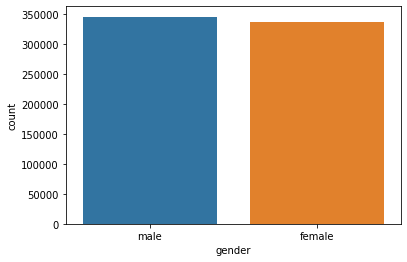

In [95]:
sns.countplot(x='gender',data=data)

<AxesSubplot:xlabel='sign', ylabel='count'>

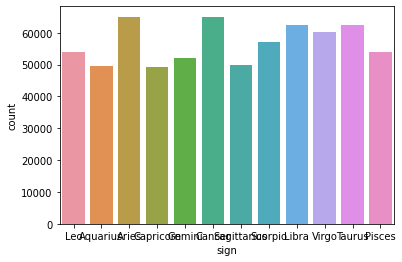

In [96]:
sns.countplot(x='sign',data=data)

In [97]:
data.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

## Data preprocessing

#### Word count in text

In [98]:
data_subset['word_counts'] = data_subset['text'].apply(lambda x: len(str(x).split()))

In [99]:
data_subset.head()

,id,gender,age,topic,sign,date,text,word_counts
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",28
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,20
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,4326
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,2
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,65


#### Removing unwanted characters and spaces

In [100]:
# remove unwanted chars other than alphanumeric

nonalphanumeric = "[^\w ]"
data_subset.text = data_subset.text.apply(lambda s : re.sub(nonalphanumeric,"",s))

In [101]:
data_subset.head()

,id,gender,age,topic,sign,date,text,word_counts
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...,28
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...,20
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,4326
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...,65


In [102]:
# remove spaces

data_subset.text = data_subset.text.apply(lambda s: s.strip())

In [103]:
data_subset.head()

,id,gender,age,topic,sign,date,text,word_counts
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and 45 MB of pd...,28
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes van der La...,20
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde MAAK JE E...,4326
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can now capture the...,65


#### Removing stop words

In [104]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
print(stopwords)

{"'d", 'below', 'several', 'even', 'anything', 'regarding', 'ourselves', 'anyone', 'front', 'him', 'whether', 'if', 'nine', "'m", 'empty', 'under', "'ll", 'name', 'indeed', 'hers', 'but', 'besides', 'around', 'five', 'six', "'ve", 'really', 'your', 'herein', 'unless', 'along', '‘ve', 'put', 'hereby', 'noone', 'third', '’ve', 'down', 'thru', 'themselves', 'that', 'i', 'every', 'already', 'might', 'since', 'thence', 'yet', 'only', 'also', 'does', 'somehow', 'often', 'by', 'those', 'elsewhere', 'who', 'n‘t', 'bottom', 'from', 'being', 'becoming', 'made', 'neither', 'me', 'latterly', 'could', 'whence', 'latter', 'moreover', 'of', 'which', 'why', 'have', 'with', 'per', 'them', 'us', 'another', 'twenty', 'never', 'because', 'hundred', 'many', 'so', '’d', 'beside', 'not', 'hereupon', 'whither', 'whatever', 'all', 'ever', 'he', 'formerly', 'both', 'amount', 'wherever', 'up', '’ll', 'whereas', 'give', 'my', 'n’t', 'did', 'yourself', 'anyhow', 'mine', 'few', 'until', 'upon', 'former', 'nor', 'th

In [105]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [106]:
len(stopwords.words('english'))

179

In [107]:
stopwords=set(stopwords.words('english'))

In [108]:
data_subset.text = data_subset.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [109]:
data_subset.head()

,id,gender,age,topic,sign,date,text,word_counts
0,2059027,male,15,Student,Leo,"14,May,2004",Info found 100 pages 45 MB pdf files Now wait ...,28
1,2059027,male,15,Student,Leo,"13,May,2004",These team members Drewes van der Laag urlLink...,20
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde MAAK JE EI...,4326
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks Yahoos Toolbar I capture URLs popupswhi...,65


#### Target / Label Merger

In [110]:
data_subset['labels'] = data_subset.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [111]:
data_subset.head()

,id,gender,age,topic,sign,date,text,word_counts,labels
0,2059027,male,15,Student,Leo,"14,May,2004",Info found 100 pages 45 MB pdf files Now wait ...,28,"[male, 15, Student, Leo]"
1,2059027,male,15,Student,Leo,"13,May,2004",These team members Drewes van der Laag urlLink...,20,"[male, 15, Student, Leo]"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde MAAK JE EI...,4326,"[male, 15, Student, Leo]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,2,"[male, 15, Student, Leo]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks Yahoos Toolbar I capture URLs popupswhi...,65,"[male, 33, InvestmentBanking, Aquarius]"


#### Train and Test Split

In [112]:
from sklearn.model_selection import train_test_split

X = data_subset.text
y = data_subset.labels


In [113]:
X

0        Info found 100 pages 45 MB pdf files Now wait ...
1        These team members Drewes van der Laag urlLink...
2        In het kader van kernfusie op aarde MAAK JE EI...
3                                          testing testing
4        Thanks Yahoos Toolbar I capture URLs popupswhi...
                               ...                        
99995    THE HINDU 125 YEARS It great see Special editi...
99996    DILBERT IITans The Global IIT Brand finds spac...
99997    Case Study How HP 3 billion PG outsourcing dea...
99998    Championing Chennai Bangalore IIM Hyderabad ho...
99999    WEEKEND It turned rather Interesting Different...
Name: text, Length: 100000, dtype: object

In [114]:
y

0                       [male, 15, Student, Leo]
1                       [male, 15, Student, Leo]
2                       [male, 15, Student, Leo]
3                       [male, 15, Student, Leo]
4        [male, 33, InvestmentBanking, Aquarius]
                          ...                   
99995                 [male, 27, Student, Virgo]
99996                 [male, 27, Student, Virgo]
99997                 [male, 27, Student, Virgo]
99998                 [male, 27, Student, Virgo]
99999                 [male, 27, Student, Virgo]
Name: labels, Length: 100000, dtype: object

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [116]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [117]:
print(X_test.shape)
print(y_test.shape)


(20000,)
(20000,)


In [118]:
X_test

6448                    A bird buries head mashed potatoes
50680    Ok seriously ruined day I like mad right would...
814      Astro Vs Braves Just got back Minute Maid stad...
20354    Greetings welcome first ever blog The concept ...
49224    She walks door room always brightens Perfect f...
                               ...                        
47661    Hey cool Jo problem Understandable Sounds lots...
56256    Last night I went see new Harry Potter movie T...
92555    urlLink When Instant Messages Come Bearing Mal...
36328    I Srajan gamers sections Class 8th entered Com...
73345    So monqiue got back together It wasnt quite dr...
Name: text, Length: 20000, dtype: object

#### Vectorization

In [119]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

In [120]:
cv = CountVectorizer(ngram_range=(1,2))

In [121]:
cv.fit(X_train)


CountVectorizer(ngram_range=(1, 2))

In [122]:
cv.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 dont',
 '00 draw',
 '00 games',
 '00 lil',
 '00 morning',
 '00 not',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 this',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 we',
 '00 well',
 '000',
 '000 address',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 heh',
 '000 if',
 '000 leaving',
 '000 my',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 if',
 '0000 new',
 '0000 now',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '000000000000000000000section 

In [123]:
X_train_cv=cv.transform(X_train)

In [124]:
X_test_cv = cv.transform(X_test)

In [125]:
print(X_train_cv)

  (0, 10384)	1
  (0, 10405)	1
  (0, 10810)	1
  (0, 10811)	1
  (0, 13669)	1
  (0, 13670)	1
  (0, 41003)	1
  (0, 41004)	1
  (0, 42594)	1
  (0, 42702)	1
  (0, 65659)	1
  (0, 65660)	1
  (0, 90684)	1
  (0, 90707)	1
  (0, 111871)	1
  (0, 112767)	1
  (0, 119370)	2
  (0, 121787)	2
  (0, 178353)	1
  (0, 178612)	1
  (0, 184548)	1
  (0, 184609)	1
  (0, 222667)	1
  (0, 222838)	1
  (0, 254771)	1
  :	:
  (79999, 504433)	1
  (79999, 505440)	1
  (79999, 705317)	1
  (79999, 705834)	1
  (79999, 1004660)	1
  (79999, 1007240)	1
  (79999, 1292628)	1
  (79999, 1680350)	1
  (79999, 1684620)	1
  (79999, 1960064)	1
  (79999, 1962181)	1
  (79999, 2370946)	1
  (79999, 2372333)	1
  (79999, 2719581)	1
  (79999, 2722159)	1
  (79999, 2728921)	1
  (79999, 2729368)	1
  (79999, 3299510)	1
  (79999, 3299555)	1
  (79999, 3943906)	1
  (79999, 3946286)	1
  (79999, 4021254)	1
  (79999, 4021446)	1
  (79999, 4130466)	1
  (79999, 4130597)	1


In [126]:
print(X_test_cv)

  (0, 481977)	1
  (0, 599541)	1
  (0, 599543)	1
  (0, 1801490)	1
  (0, 2477744)	1
  (0, 2477763)	1
  (0, 3087160)	1
  (1, 8564)	1
  (1, 9254)	1
  (1, 20576)	1
  (1, 66306)	1
  (1, 66412)	1
  (1, 73104)	1
  (1, 77050)	1
  (1, 119370)	2
  (1, 120542)	1
  (1, 125692)	1
  (1, 145064)	1
  (1, 146959)	1
  (1, 158749)	2
  (1, 158840)	1
  (1, 181632)	1
  (1, 184797)	1
  (1, 185107)	1
  (1, 186056)	2
  :	:
  (19999, 3809625)	1
  (19999, 3951132)	1
  (19999, 3951170)	1
  (19999, 3977556)	1
  (19999, 4008110)	2
  (19999, 4008235)	1
  (19999, 4021254)	1
  (19999, 4025092)	1
  (19999, 4091716)	1
  (19999, 4093925)	1
  (19999, 4099584)	1
  (19999, 4100518)	1
  (19999, 4300581)	1
  (19999, 4300641)	1
  (19999, 4361886)	1
  (19999, 4363220)	1
  (19999, 4381463)	1
  (19999, 4383141)	1
  (19999, 4383270)	1
  (19999, 4410254)	1
  (19999, 4416330)	1
  (19999, 4438032)	1
  (19999, 4439350)	1
  (19999, 4451099)	1
  (19999, 4514266)	1


#### creating a ditionary to get count of every label 
#### Key -label name ,  value - count of label

In [127]:
label_cnt=dict()

for labels in data_subset.labels.values:
    for label in labels:
        if label in label_cnt:
            label_cnt[str(label)]+=1
        else:
            label_cnt[str(label)]=1

In [128]:
label_cnt

{'male': 53358,
 '15': 1,
 'Student': 22122,
 'Leo': 8230,
 '33': 1,
 'InvestmentBanking': 244,
 'Aquarius': 9050,
 'female': 46642,
 '14': 1,
 'indUnk': 33097,
 'Aries': 10637,
 '25': 1,
 'Capricorn': 8723,
 '17': 1,
 'Gemini': 9225,
 '23': 1,
 'Non-Profit': 1326,
 'Cancer': 9253,
 'Banking': 354,
 '37': 1,
 'Sagittarius': 7366,
 '26': 1,
 '24': 1,
 'Scorpio': 7049,
 '27': 1,
 'Education': 5553,
 '45': 1,
 'Engineering': 2332,
 'Libra': 7250,
 'Science': 1090,
 '34': 1,
 '41': 1,
 'Communications-Media': 2830,
 'BusinessServices': 626,
 'Sports-Recreation': 406,
 'Virgo': 7134,
 'Taurus': 8530,
 'Arts': 5031,
 'Pisces': 7553,
 '44': 1,
 '16': 1,
 'Internet': 2251,
 'Museums-Libraries': 308,
 'Accounting': 528,
 '39': 1,
 '35': 1,
 'Technology': 8484,
 '36': 1,
 'Law': 360,
 '46': 1,
 'Consulting': 905,
 'Automotive': 124,
 '42': 1,
 'Religion': 1081,
 '13': 1,
 'Fashion': 1898,
 '38': 1,
 '43': 1,
 'Publishing': 1079,
 '40': 1,
 'Marketing': 726,
 'LawEnforcement-Security': 368,
 'Hum

#### Transform Labels - using MultiLabelBinarizer to convert the train and test labels

In [129]:
from sklearn.preprocessing import MultiLabelBinarizer

In [130]:
binarizer=MultiLabelBinarizer(classes=sorted(label_cnt.keys()))


In [131]:
y_train_ml = binarizer.fit_transform(y_train)

In [132]:
y_test_ml = binarizer.transform(y_test)

In [133]:
y_train_ml

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [134]:
y_test_ml

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

## Design, train, tune and test the best text classifier

### One vs Rest Classifier

In [135]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [136]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)


In [137]:
model.fit(X_train_cv,y_train_ml)

OneVsRestClassifier(estimator=LogisticRegression())

In [138]:
prediction=model.predict(X_test_cv)

In [139]:
prediction

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

## Classification Report

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score


In [141]:
print('Accuracy score: ', accuracy_score(y_test_ml, prediction))
print('F1 score: Micro', f1_score(y_test_ml, prediction, average='micro'))
print('Average precision score: Micro', average_precision_score(y_test_ml, prediction, average='micro'))
print('Average recall score: Micro', recall_score(y_test_ml,prediction, average='micro'))

Accuracy score:  0.10935
F1 score: Micro 0.4795379048184382
Average precision score: Micro 0.29076865472869345
Average recall score: Micro 0.3500666666666667


In [142]:
print('Accuracy score: ', accuracy_score(y_test_ml, prediction))
print('F1 score: Micro', f1_score(y_test_ml, prediction, average='macro'))
print('Average precision score: Micro', average_precision_score(y_test_ml, prediction, average='macro'))
print('Average recall score: Micro', recall_score(y_test_ml,prediction, average='macro'))

Accuracy score:  0.10935
F1 score: Micro 0.15933353579235718
Average precision score: Micro nan
Average recall score: Micro 0.10603838471314223


### Print the true vs predicted labels for any 5 entries from the dataset

In [144]:
predicted=prediction[:10]
actual=y_test_ml[:10]

In [145]:
print(binarizer.inverse_transform(prediction)[100])
print(binarizer.inverse_transform(y_test_ml)[100])

('male',)
('Pisces', 'Technology', 'male')


In [146]:
print(binarizer.inverse_transform(prediction)[101])
print(binarizer.inverse_transform(y_test_ml)[101])

('male',)
('Aries', 'Fashion', 'male')


In [147]:
print(binarizer.inverse_transform(prediction)[102])
print(binarizer.inverse_transform(y_test_ml)[102])

('male',)
('Aries', 'Fashion', 'male')


In [148]:
print(binarizer.inverse_transform(prediction)[103])
print(binarizer.inverse_transform(y_test_ml)[103])

('male',)
('Aries', 'Fashion', 'male')


In [149]:
print(binarizer.inverse_transform(prediction)[104])
print(binarizer.inverse_transform(y_test_ml)[104])

()
('Communications-Media', 'Pisces', 'female')


## Summary:

- Analysis is performed on the dataset and we see that the males are more than female 

- indUnk topic has more count

- Data preprocessing is performed where we count the words, remove unwanted characters, spaces, stop words

- Words are converted to vectors

- MultiLabelBinarizer is used to convert the train and test labels

- The Model is trained using one vs rest classifier and accuracy is found

- True and prediced label is prediced for 5 entries of dataset